# Lecture 01 Demos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stem_plot(n, x_n, limit_axes=2):
    fig, ax = plt.subplots(1, 1)
    ax.stem(n, x_n)
    ax.set_xticks(n)
    ax.set_ylim(-limit_axes, limit_axes)
    ax.set_xlabel("n", fontsize=14)

## Demo 1: shift, scale, and reverse

In [ ]:
def timeshift(n_0, signal):
    def shifted_signal(n):
        return signal(n + n_0)
    return shifted_signal

In [ ]:
def our_signal(n):
    return np.sin(2 * np.pi * n / 20)

In [ ]:
n_range = np.arange(0, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


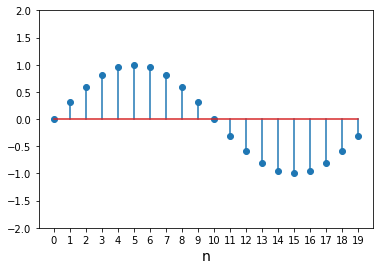

In [ ]:
stem_plot(n_range, our_signal(n_range))

In [ ]:
shifted_signal = timeshift(3, our_signal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


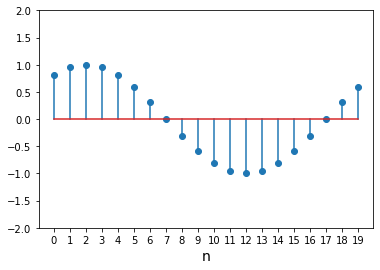

In [ ]:
stem_plot(n_range, shifted_signal(n_range))

In [ ]:
def timescale(a, signal):
    def scaled_signal(n):
        return signal(a * n)
    return scaled_signal

In [ ]:
scaled_signal = timescale(2, our_signal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


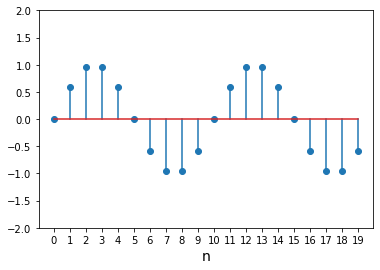

In [ ]:
stem_plot(n_range, scaled_signal(n_range))

In [ ]:
fancy_signal = timescale(4, timeshift(3, our_signal))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


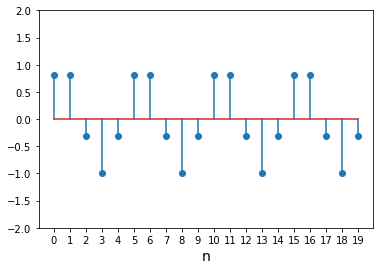

In [ ]:
stem_plot(n_range, fancy_signal(n_range))

## Demo 2: systems

## Demo 3: linearity

Example 1: $y[n] = x[n-2] - 2x[n-8]$ 

Example 2: $y[n] = x[n-2]^2$

In [ ]:
def system1(signal):
    def output_signal(n):
        return signal(n - 2) - 2 * signal(n - 8)
    return output_signal

def system2(signal):
    def output_signal(n):
        return signal(n - 2) ** 2
    return output_signal

In [ ]:
signal1 = our_signal
signal2 = timeshift(2, timescale(3, our_signal))

In [ ]:
a = 0.2
b = 0.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


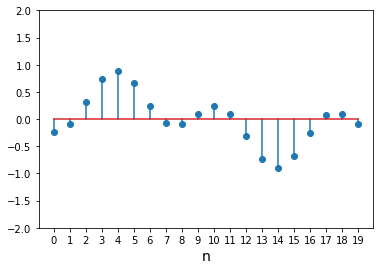

In [ ]:
stem_plot(
    n_range,
    a * system1(signal1)(n_range) + b * system1(signal2)(n_range)    
)

In [ ]:
def superpose_signals(a, signal1, b, signal2):
    def output_signal(n):
        return a * signal1(n) + b * signal2(n)
    return output_signal

In [ ]:
superposed_signal = superpose_signals(a, signal1, b, signal2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


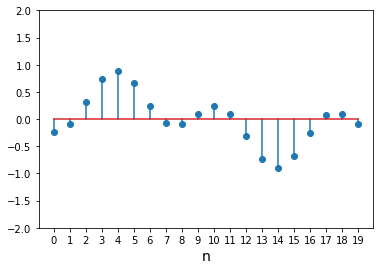

In [ ]:
stem_plot(
    n_range,
    system1(superposed_signal)(n_range)
    # This was my error in class - I didn't actually apply the system
    # to the superposed signal. This is fixed, and now you can see that
    # it is indeed a linear system.
    # superposed_signal(n_range)
)